In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv("data_cleaned.csv")

In [4]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Average Salary,Company_text,State,Same_state,Age,python,spark,R,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research,NM,0,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System,MD,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4,FL,1,10,1,1,0,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL,WA,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions,NY,1,22,1,0,0,0,1


In [11]:
#further cleaning some of the data
#getting title field values and seniority level
def title_update(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'junior'
    else:
        return 'na'
    

In [12]:
df['job_simp'] = df['Job Title'].apply(title_update) # to make a column with count of job title

In [13]:
df['seniority'] = df['Job Title'].apply(seniority) #to make a column with job seniority

In [17]:
#to replace 'los angeles' is State with CA.
df['State'] = df['State'].apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')

In [19]:
#to check JD length, if it have a relation with higher salary or something
df['JD_len'] = df['Job Description'].apply(lambda x: len(x))

In [26]:
# count of competitor
df['CompetitorCount'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [46]:
#hourly wage to annual (multiple by 2000)
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly==1 else x.min_salary, axis=1)

In [47]:
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly==1 else x.max_salary, axis=1)

In [53]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min salary', 'max salary',
       'Average Salary', 'Company_text', 'State', 'Same_state', 'Age',
       'python', 'spark', 'R', 'aws', 'excel', 'job_simp', 'seniority',
       'JD_len', 'CompetitorCount'],
      dtype='object')

In [55]:
df.describe()

,Rating,Founded,hourly,employer_provided,min salary,max salary,Average Salary,Same_state,Age,python,spark,R,aws,excel,JD_len,CompetitorCount
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.225067,0.001348,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.417908,0.036711,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


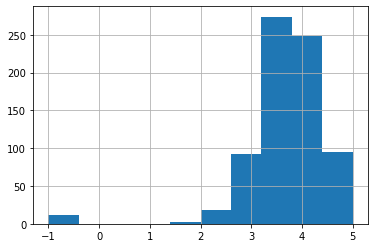

In [56]:
df.Rating.hist()

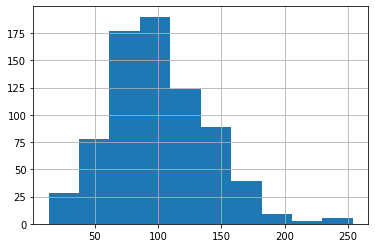

In [58]:
df['Average Salary'].hist()

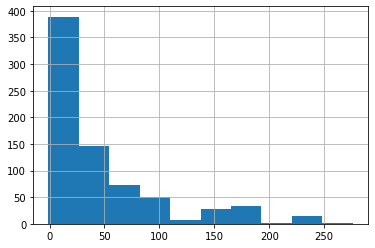

In [59]:
df.Age.hist()

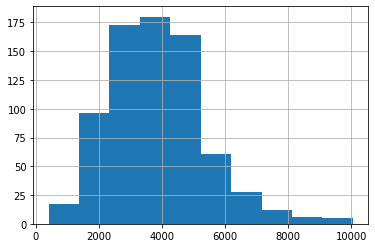

In [60]:
df["JD_len"].hist()

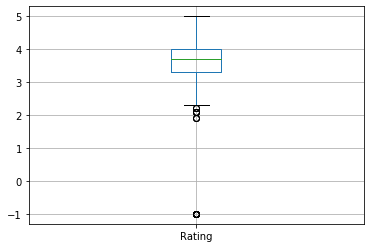

In [62]:
df.boxplot(column=['Rating'])

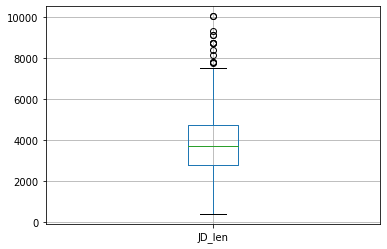

In [63]:
df.boxplot(column=['JD_len'])

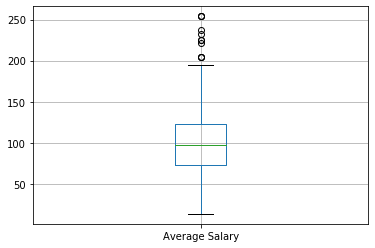

In [64]:
df.boxplot(column=['Average Salary'])

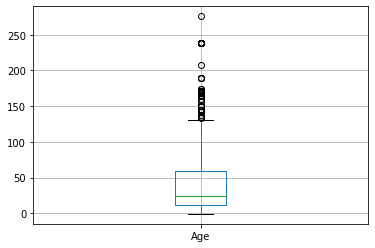

In [65]:
df.boxplot(column=['Age'])

In [68]:
df[['Age','Average Salary','Rating','JD_len']].corr()

,Age,Average Salary,Rating,JD_len
Age,1.000000,0.019655,0.021655,0.163911
Average Salary,0.019655,1.000000,0.013492,0.078808
Rating,0.021655,0.013492,1.000000,-0.012281
JD_len,0.163911,0.078808,-0.012281,1.000000


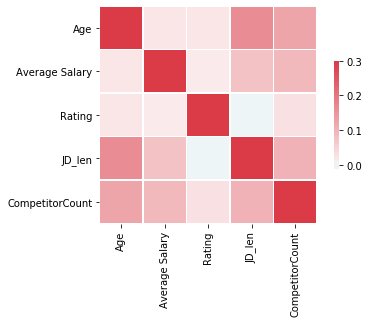

In [71]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['Age','Average Salary','Rating','JD_len','CompetitorCount']].corr(), vmax=.3, center=0,cmap=cmap, square=True, linewidth=.5,
           cbar_kws={"shrink":.5})

In [87]:
df_cate = df[['Location', 'Headquarters','Company_text','Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'State',
       'python', 'spark', 'R', 'aws', 'excel', 'job_simp', 'seniority']]

total number of Location = 200


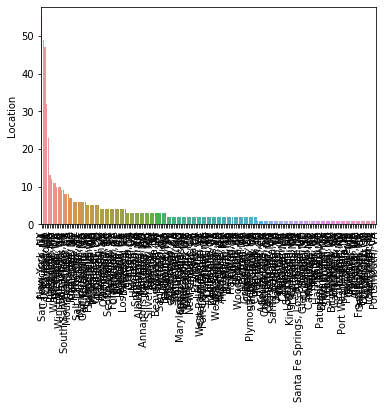

total number of Headquarters = 198


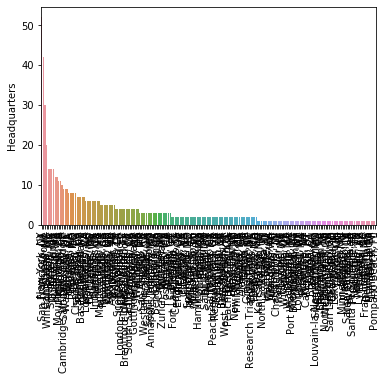

total number of Company_text = 343


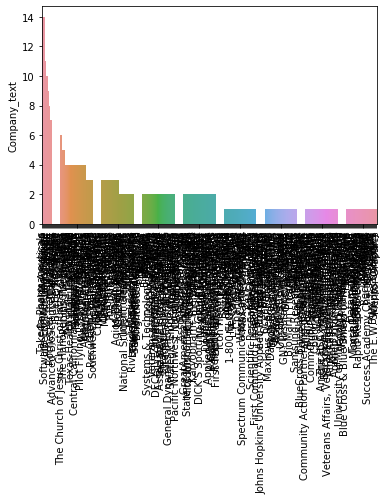

total number of Size = 9


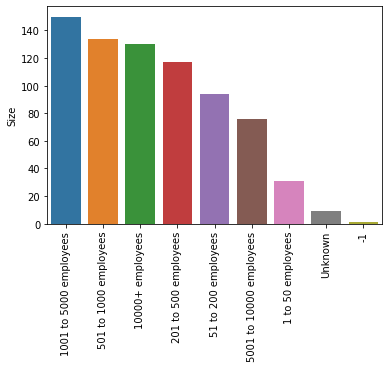

total number of Type of ownership = 11


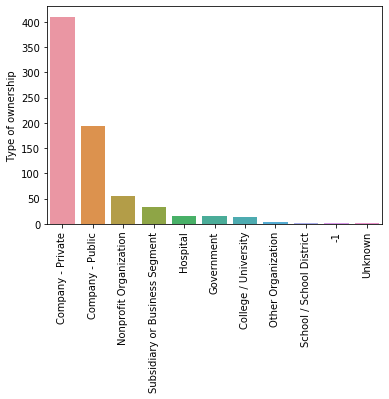

total number of Industry = 60


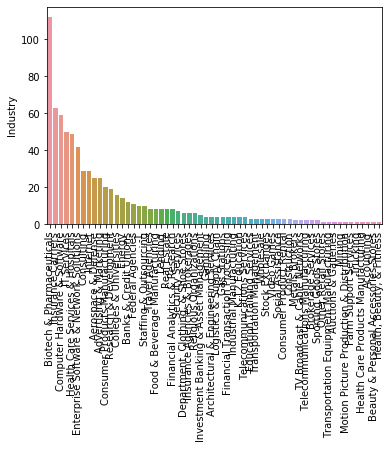

total number of Sector = 25


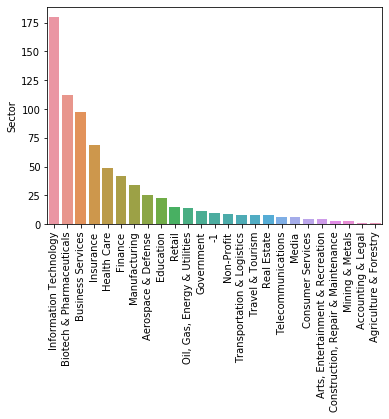

total number of Revenue = 14


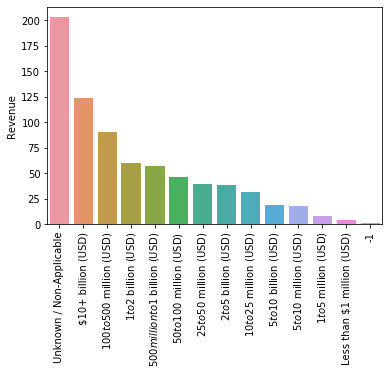

total number of State = 37


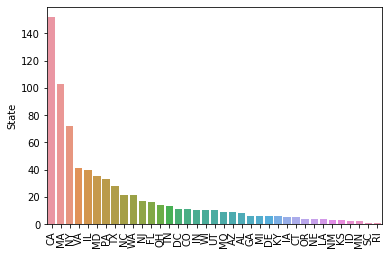

total number of python = 2


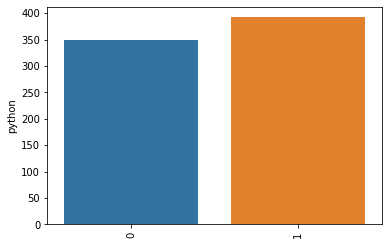

total number of spark = 2


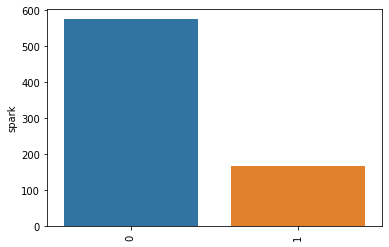

total number of R = 2


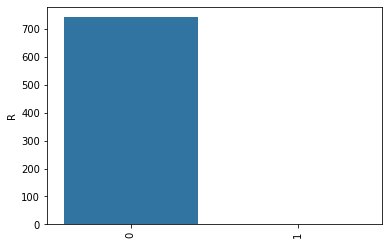

total number of aws = 2


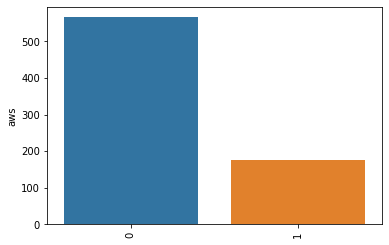

total number of excel = 2


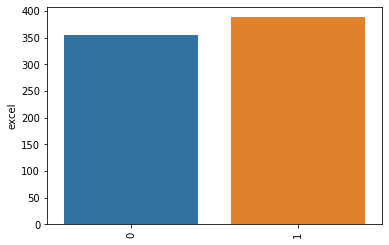

total number of job_simp = 7


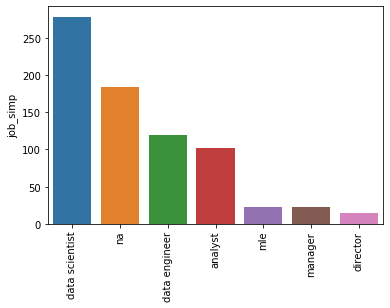

total number of seniority = 3


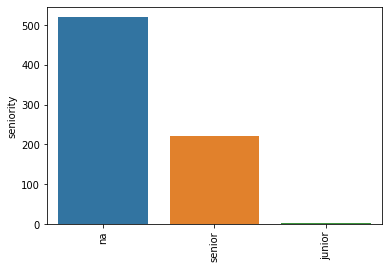

In [88]:
for i in df_cate.columns:
    cate_num = df_cate[i].value_counts()
    print("total number of %s = %d" %(i,len(cate_num)))
    chart = sns.barplot(x=cate_num.index, y=cate_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

total number of Location = 20


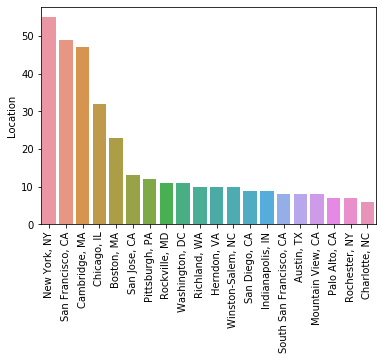

total number of Headquarters = 20


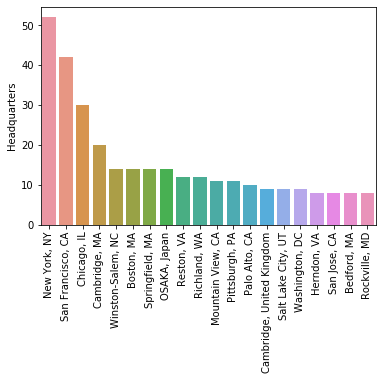

total number of Company_text = 20


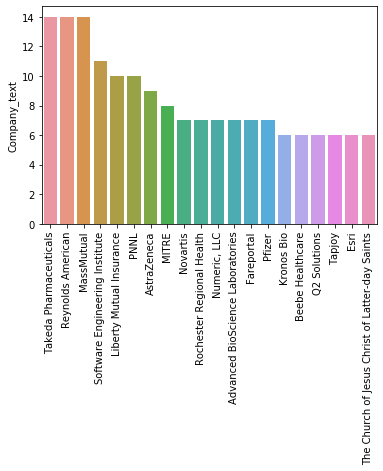

In [89]:
for i in df_cate[['Location', 'Headquarters','Company_text']].columns:
    cate_num = df_cate[i].value_counts()[:20]
    print("total number of %s = %d" %(i,len(cate_num)))
    chart = sns.barplot(x=cate_num.index, y=cate_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [90]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min salary', 'max salary',
       'Average Salary', 'Company_text', 'State', 'Same_state', 'Age',
       'python', 'spark', 'R', 'aws', 'excel', 'job_simp', 'seniority',
       'JD_len', 'CompetitorCount'],
      dtype='object')

In [92]:
pd.pivot_table(df, index='job_simp', values='Average Salary')

,Average Salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [94]:
# 'Rating', Type of ownership', 'Industry', 'Sector', 'Revenue','hourly', 'employer_provided'
#'python', 'spark', 'R', 'aws', 'excel','JD_len', 'CompetitorCount
df_pivots = df[['Rating', 'Type of ownership', 'Industry', 'Sector', 'Revenue','hourly', 'employer_provided','python', 'spark', 'R', 'aws', 'excel','JD_len', 'CompetitorCount','Average Salary']]

In [98]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index=i, values = 'Average Salary').sort_values('Average Salary',ascending = False))

Rating
        Average Salary
Rating                
-1.0        136.181818
 5.0        134.700000
 2.5        120.000000
 4.5        117.714286
 4.1        116.368421
 3.9        113.071429
 2.6        109.083333
 4.4        108.606061
 3.2        105.500000
 4.0        105.340426
 3.5        104.897959
 3.7        104.131148
 4.7        103.983871
 4.3        102.468750
 3.3        101.858974
 4.2        100.442308
 2.2         97.750000
 4.6         97.250000
 3.8         96.811475
 2.1         95.900000
 3.4         93.011364
 1.9         87.500000
 3.1         86.580000
 3.0         85.588235
 3.6         85.467391
 2.8         83.928571
 2.7         83.250000
 2.3         81.500000
 2.9         81.138889
 4.8         80.277778
 2.4         60.214286
Type of ownership
                                Average Salary
Type of ownership                             
-1                                  117.500000
Company - Public                    110.893782
Subsidiary or Business Segme

ValueError: Grouper for 'Average Salary' not 1-dimensional

In [135]:
import nltk
nltk.download('punkt') #download all the necessary classes needed for Tokenization

[nltk_data] Downloading package punkt to /Users/asyadav/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [136]:
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

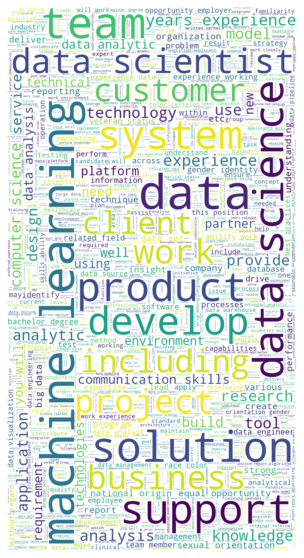

In [140]:
word = "".join(df["Job Description"])

def punctuation_stop(text):
    filtered = []
    #STOPWORDS have by default stopwords, in order to specify your words as well uncoment next line. List of Stopword can be extended as well
    #stop_words = set(stopwords.words('english')) #to filter stopwords(meaningless words in a sentence)
    word_tokens=word_tokenize(text)#tokens of words like "God is Great! I won a lottery." output will be ['God', 'is', 'Great', '!', 'I', 'won', 'a', 'lottery', '.']
    for w in word_tokens:
        if w not in STOPWORDS and w.isalpha():
            filtered.append(w.lower())
    return filtered

words_filtered = punctuation_stop(word)

text = " ".join(i for i in words_filtered)#joining each word to create one big text for all JD
wc = WordCloud(background_color="white", random_state=1, stopwords = STOPWORDS, max_words=2000, width=800, height=1500).generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
    